In [6]:
import nltk
import sklearn
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import csv
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## read the files ##
train = pd.read_csv("../data/OLID_train.csv")
test  = pd.read_csv("../data/OLID_test.csv")

## Split the data into X and Y
X_train = train['tweet']
X_test = test['tweet']
y_train = train['label']
y_test = test['label']

# TF-IDF Feature
tfidf_vectorizer = TfidfVectorizer()
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)
joblib.dump(tfidf_vectorizer, '../model/svm/olid_tfidf_vectorizer.pkl')

['../model/svm/olid_tfidf_vectorizer.pkl']

In [3]:
## declaring classifier and training ## 
clf =  LinearSVC(max_iter=2000)
clf.fit(X_train_vec, y_train)
joblib.dump(clf, '../model/svm/olid_svm_model.pkl')

C:\Users\Widya\anaconda3\envs\thesis\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


['../model/svm/olid_svm_model.pkl']

In [8]:
df_x = pd.read_csv("../predictions/OLID_NONOBF_svm_tf.csv")
df_x['label'].value_counts()
df_x.head()

,tweet,label,pred
0,whoisq wherestheserver dumpnike declasfisa dem...,OFF,OFF
1,constitutionday is revered by conservatives ha...,NOT,NOT
2,foxnews nra maga potus trump ndamendment rnc u...,NOT,NOT
3,watching boomer getting the news that she is s...,NOT,NOT
4,nopasaran unity demo to oppose the farright in...,OFF,NOT


              precision    recall  f1-score   support

         NOT       0.83      0.92      0.87       620
         OFF       0.71      0.50      0.59       240

    accuracy                           0.80       860
   macro avg       0.77      0.71      0.73       860
weighted avg       0.80      0.80      0.79       860




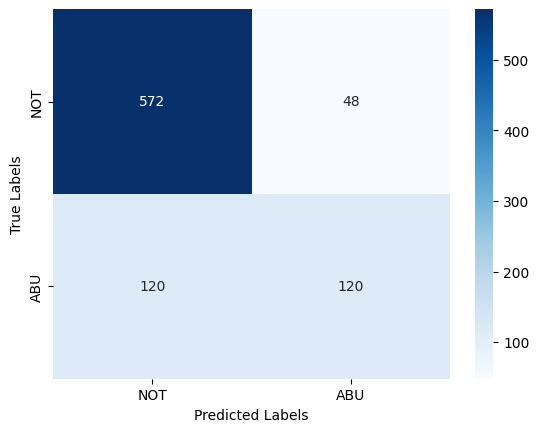

In [7]:
## prediction ##
# predicted_label = clf.predict(X_test_vec)
# test['pred'] = predicted_label.tolist()
# test.to_csv('../predictions/OLID_NONOBF_svm_tf.csv', index = False)

df = pd.read_csv("../predictions/OLID_NONOBF_svm_tf.csv")
y_gold = df["label"]
y_pred = df["pred"]
report = classification_report(y_gold, y_pred, digits=2)
print(report)
print()
confusion_matrix_data = sklearn.metrics.confusion_matrix(y_gold, y_pred)
cm = sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
classes = ['NOT', 'ABU']
cm.set_xticklabels(classes)
cm.set_yticklabels(classes)
plt.show()

# Prediction on Obfuscated set

In [3]:
#load model and vectorizer#
loaded_model = joblib.load('../model/svm/olid_svm_model.pkl')
loaded_tfidf_vectorizer = joblib.load('../model/svm/olid_tfidf_vectorizer.pkl')

In [8]:
def predict(file_path, model, vectorizer):
    df = pd.read_csv(file_path)
    X = df['obfuscated_tweet']
    X_vec = vectorizer.transform(X)
    predicted_label = model.predict(X_vec)
    df['pred'] = predicted_label.tolist()
    return df

def generate_classification_report(df):
    y_gold = df["label"]
    y_pred = df["pred"]
    report = classification_report(y_gold, y_pred, digits=2)
    confusion_matrix_data = sklearn.metrics.confusion_matrix(y_gold, y_pred)
    cm = sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    classes = ['NOT', 'ABU']
    cm.set_xticklabels(classes)
    cm.set_yticklabels(classes)
    plt.show()
    return report  

def evaluate(data_path, model, vectorizer, save=True):
    df_pred = predict(data_path, model, vectorizer)
    if save:
        output_file = f'{os.path.basename(data_path).split(".")[0]}_pred.csv'
        output_path = f'../predictions/olid_obf/{output_file}'    
        df_pred.to_csv(output_path, index=False)
    print(generate_classification_report(df_pred))

Classification report for OLID_OBF_1interleave.csv


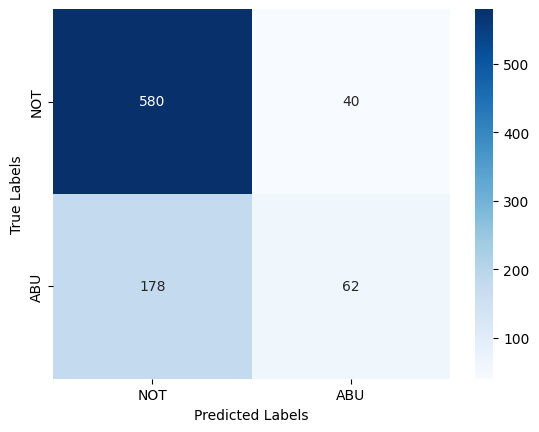

              precision    recall  f1-score   support

         NOT       0.77      0.94      0.84       620
         OFF       0.61      0.26      0.36       240

    accuracy                           0.75       860
   macro avg       0.69      0.60      0.60       860
weighted avg       0.72      0.75      0.71       860


Classification report for OLID_OBF_2swapchar.csv


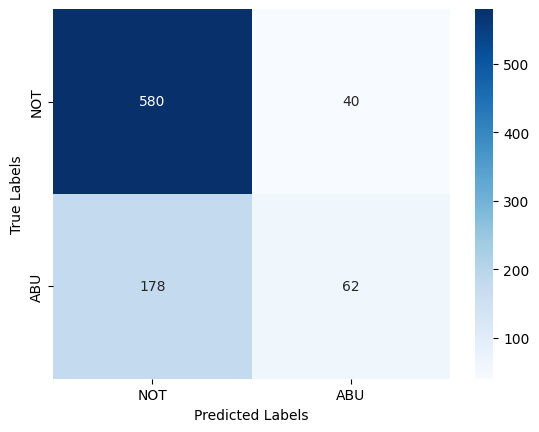

              precision    recall  f1-score   support

         NOT       0.77      0.94      0.84       620
         OFF       0.61      0.26      0.36       240

    accuracy                           0.75       860
   macro avg       0.69      0.60      0.60       860
weighted avg       0.72      0.75      0.71       860


Classification report for OLID_OBF_3replace_o.csv


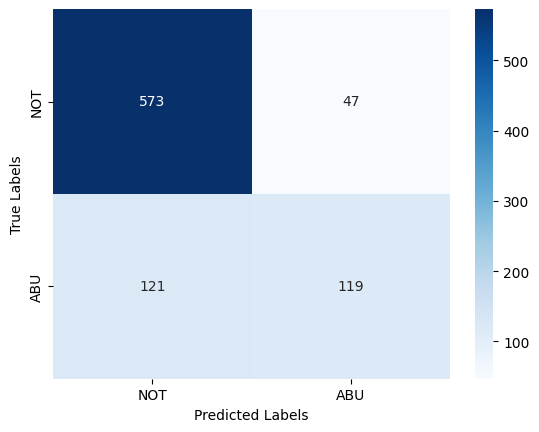

              precision    recall  f1-score   support

         NOT       0.83      0.92      0.87       620
         OFF       0.72      0.50      0.59       240

    accuracy                           0.80       860
   macro avg       0.77      0.71      0.73       860
weighted avg       0.80      0.80      0.79       860


Classification report for OLID_OBF_4ommit_char.csv


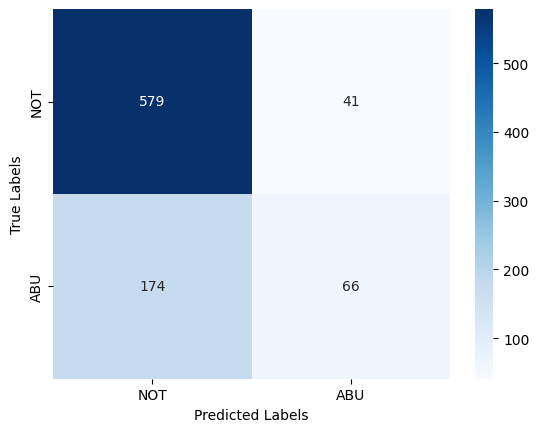

              precision    recall  f1-score   support

         NOT       0.77      0.93      0.84       620
         OFF       0.62      0.28      0.38       240

    accuracy                           0.75       860
   macro avg       0.69      0.60      0.61       860
weighted avg       0.73      0.75      0.71       860


Classification report for OLID_OBF_5extra_char.csv


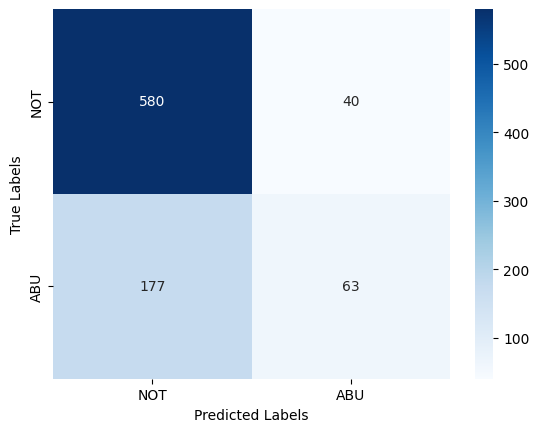

              precision    recall  f1-score   support

         NOT       0.77      0.94      0.84       620
         OFF       0.61      0.26      0.37       240

    accuracy                           0.75       860
   macro avg       0.69      0.60      0.60       860
weighted avg       0.72      0.75      0.71       860


Classification report for OLID_OBF_6to_asterisks.csv


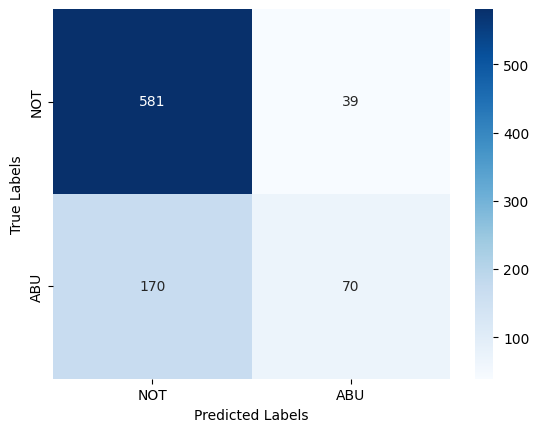

              precision    recall  f1-score   support

         NOT       0.77      0.94      0.85       620
         OFF       0.64      0.29      0.40       240

    accuracy                           0.76       860
   macro avg       0.71      0.61      0.62       860
weighted avg       0.74      0.76      0.72       860


Classification report for OLID_OBF_7duplicate_char.csv


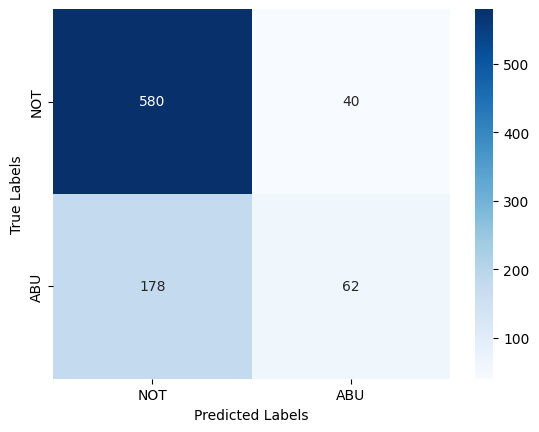

              precision    recall  f1-score   support

         NOT       0.77      0.94      0.84       620
         OFF       0.61      0.26      0.36       240

    accuracy                           0.75       860
   macro avg       0.69      0.60      0.60       860
weighted avg       0.72      0.75      0.71       860


Classification report for OLID_OBF_8random_obf.csv


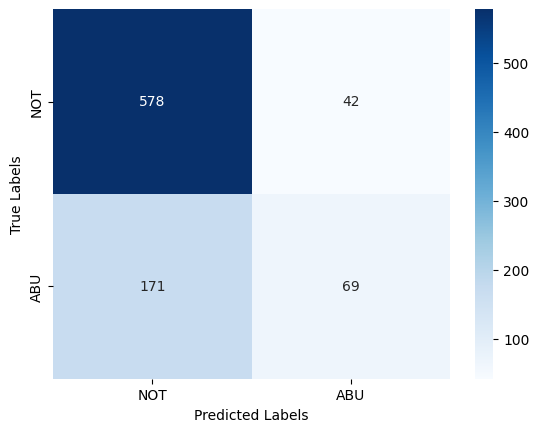

              precision    recall  f1-score   support

         NOT       0.77      0.93      0.84       620
         OFF       0.62      0.29      0.39       240

    accuracy                           0.75       860
   macro avg       0.70      0.61      0.62       860
weighted avg       0.73      0.75      0.72       860




In [9]:
path_data = '../data/olid_obf/'
for f in os.listdir(path_data):
    if f.endswith('.csv'):
        print(f"Classification report for {f}")
        evaluate(os.path.join(path_data, f), loaded_model, loaded_tfidf_vectorizer)
        print()